# 算法原理

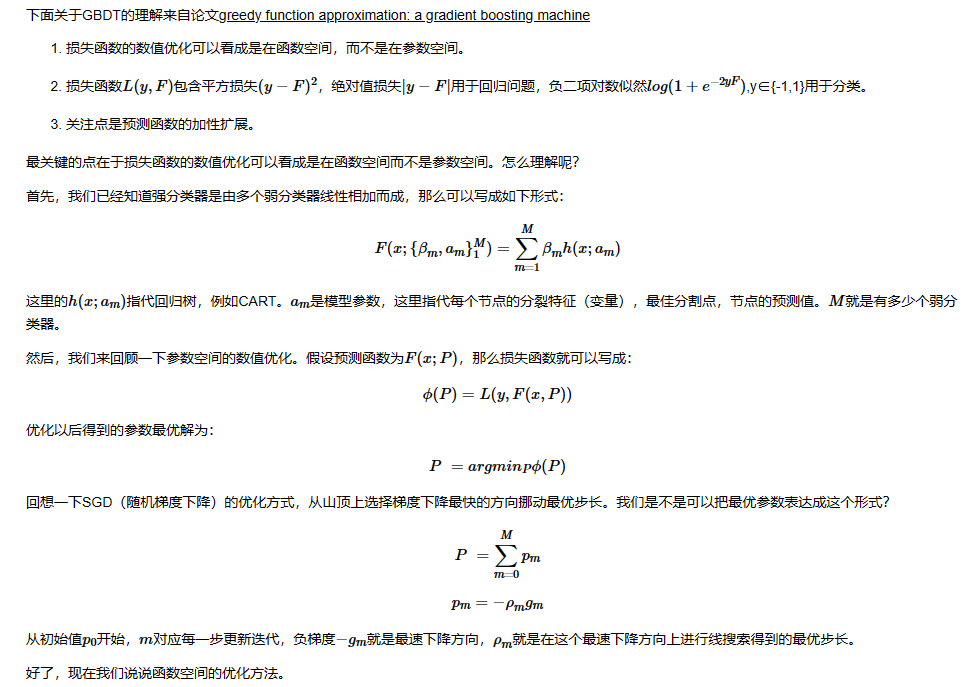
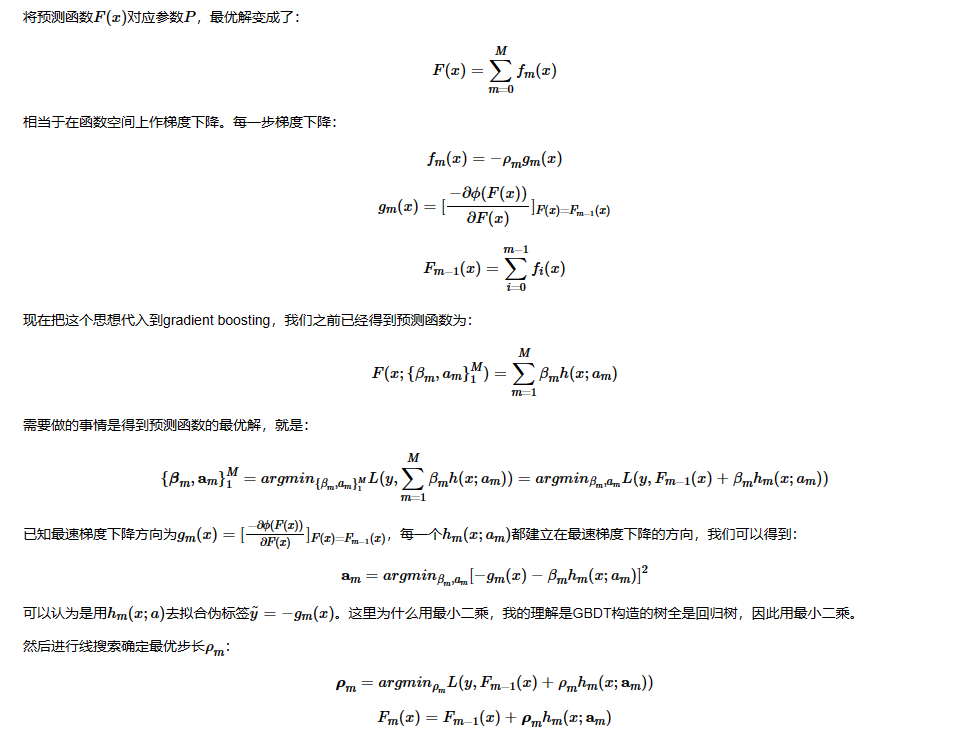
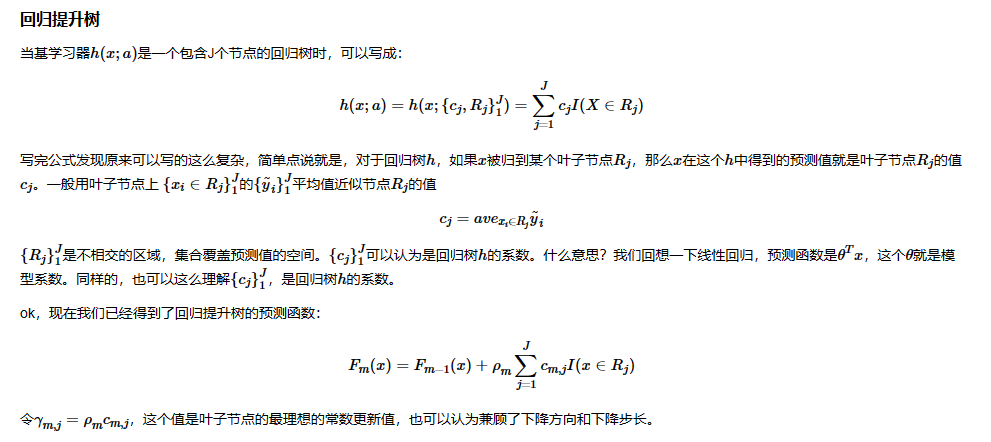
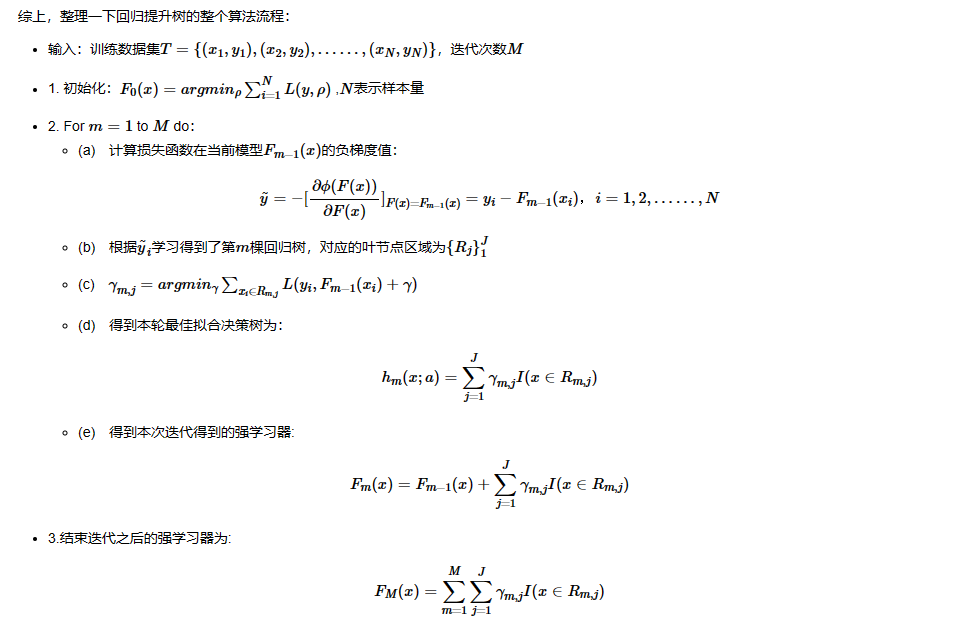
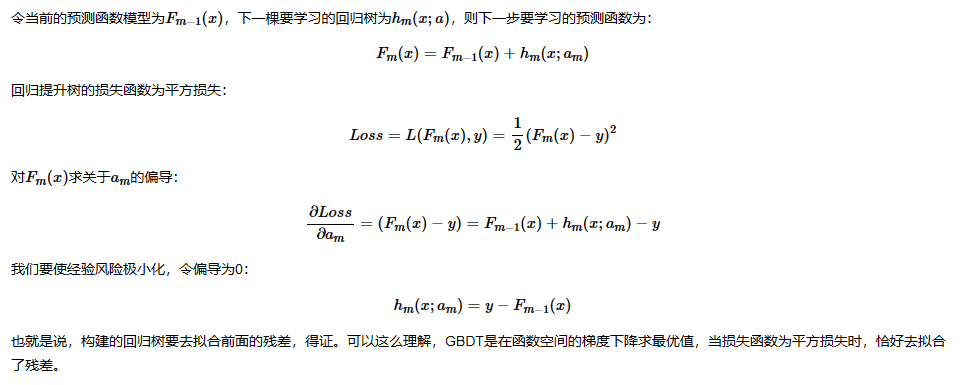
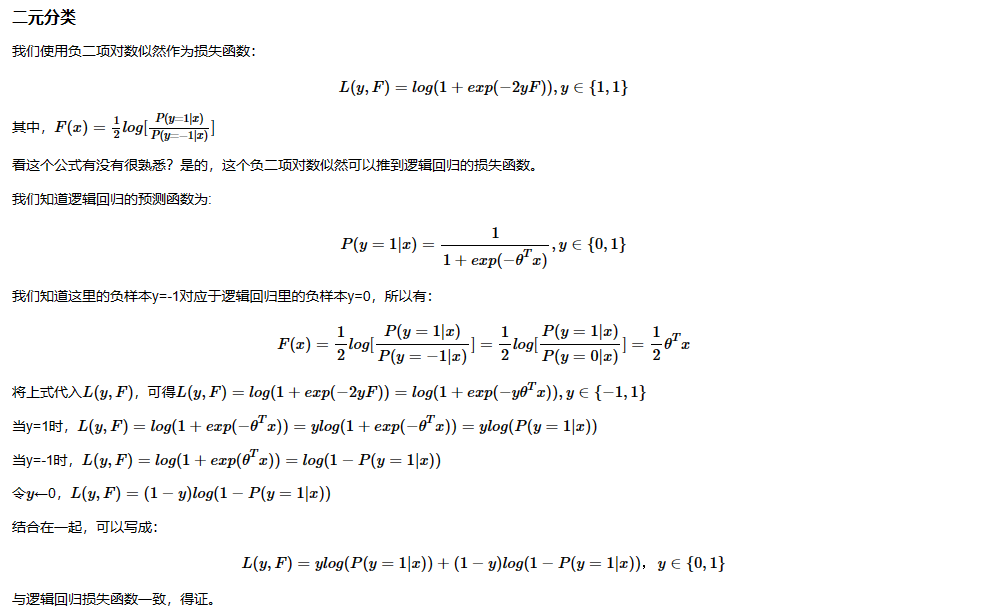
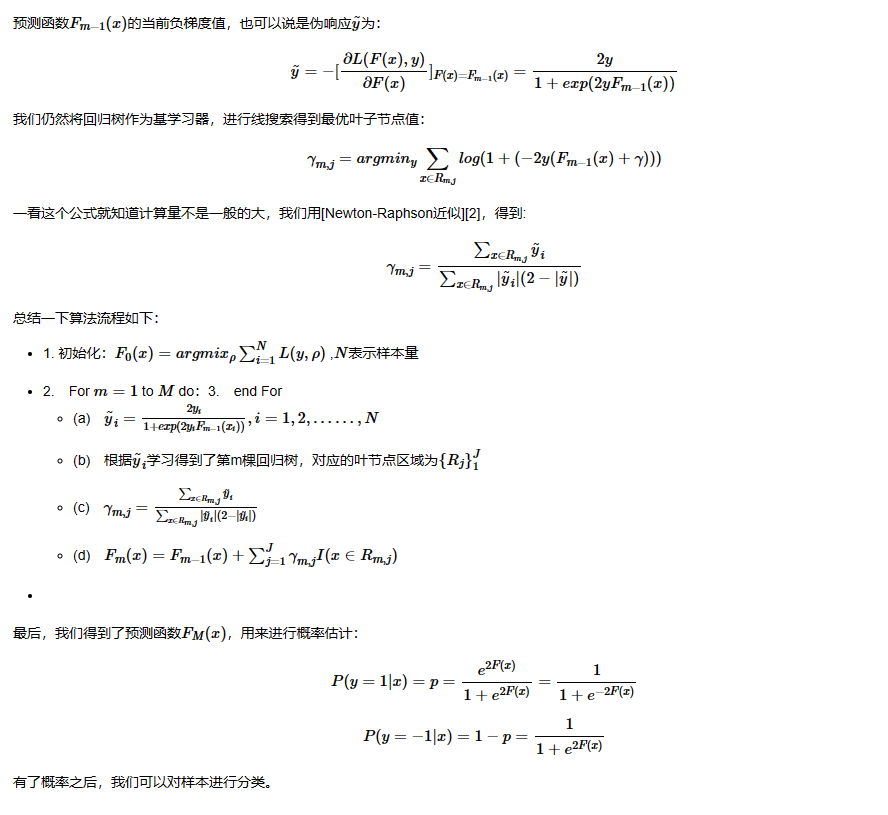

# 数据准备

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier # 梯度提升回归树
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#读取数据
data = pd.read_csv("../data/iris.csv")
print(data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
#准备数据
data = data.dropna()
y = data['Species'].apply(lambda x: 1 if x == 'setosa' else 2 if x == 'versicolor' else 3)
x = data.drop(['Species'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

In [4]:
# 分类模型、参数
model = GradientBoostingClassifier(random_state = 0)
param_grid = {'max_depth': [5, 10, 15]}

# GridSearchCV优化参数、训练模型
gsearch = GridSearchCV(model, param_grid)
model = gsearch.fit(x_train, y_train)

# 打印最优结果
print('RandomForest params:', model.best_estimator_)

RandomForest params: GradientBoostingClassifier(max_depth=10, random_state=0)


In [5]:
gbrt = GradientBoostingClassifier(max_depth=10, random_state=0)
gbrt.fit(x_train, y_train)
gbrt.feature_importances_ # 特征重要性

array([0.01656741, 0.01681162, 0.69919717, 0.2674238 ])

Text(0, 0.5, 'Feature')

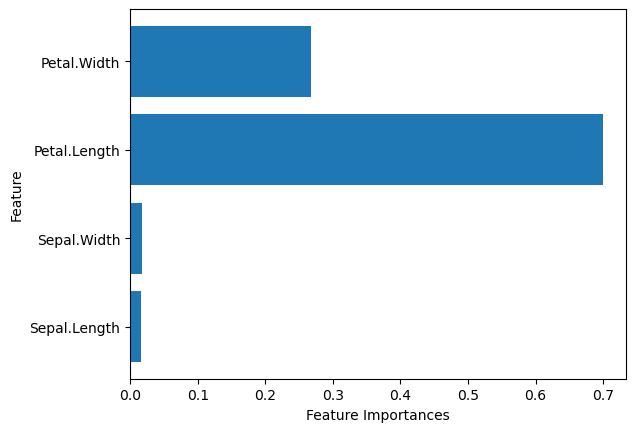

In [6]:
can = {n:v for n,v in zip(data.columns,gbrt.feature_importances_)}
plt.barh(list(can.keys()),list(can.values()),align = 'center')
plt.xlabel("Feature Importances")
plt.ylabel("Feature")

# 模型保存

In [7]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../test/best_models/gbdt.pkl')

# 加载模型
model = joblib.load('../test/best_models/gbdt.pkl')

In [8]:
# 法二
import pickle

with open('../test/best_models/gbdt.pkl', 'wb') as f:
    pickle.dump(model, f)
 
#读取Model
with open('../test/best_models/gbdt.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [9]:
prediction = model.predict(x_test)

In [10]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 1.0


In [11]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

